# dataset from https://www.kaggle.com/uciml/mushroom-classification
Classification of mushrooms into poisonous or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
df = pd.read_csv("datasets/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

No missing values, nice

In [5]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
df[df['veil-type'] == 'p'].shape[0] == df.shape[0]

True

Weird. Only one veil type. Seems to be a useless feature

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

<IPython.core.display.Javascript object>


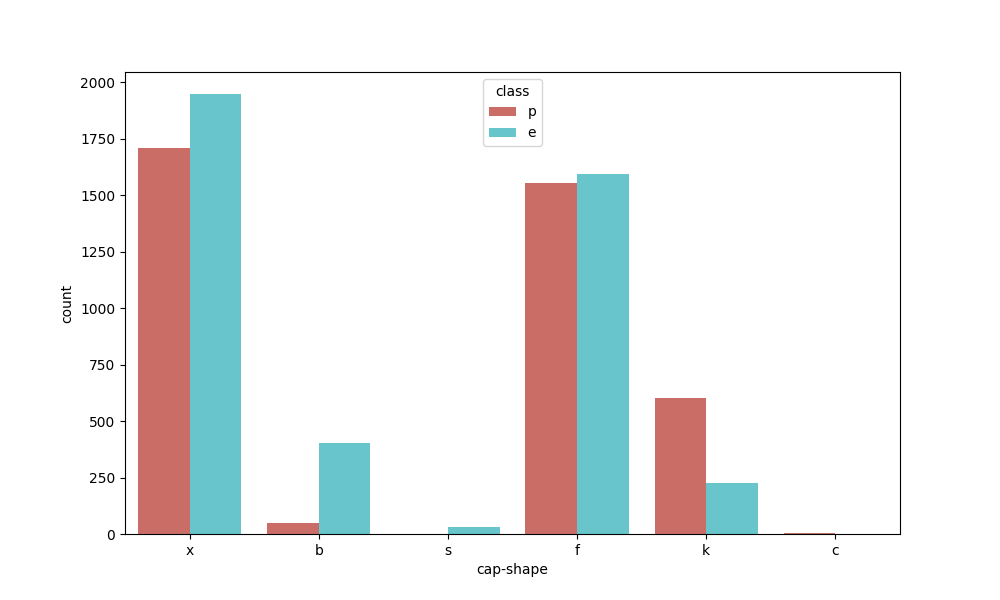

<IPython.core.display.Javascript object>


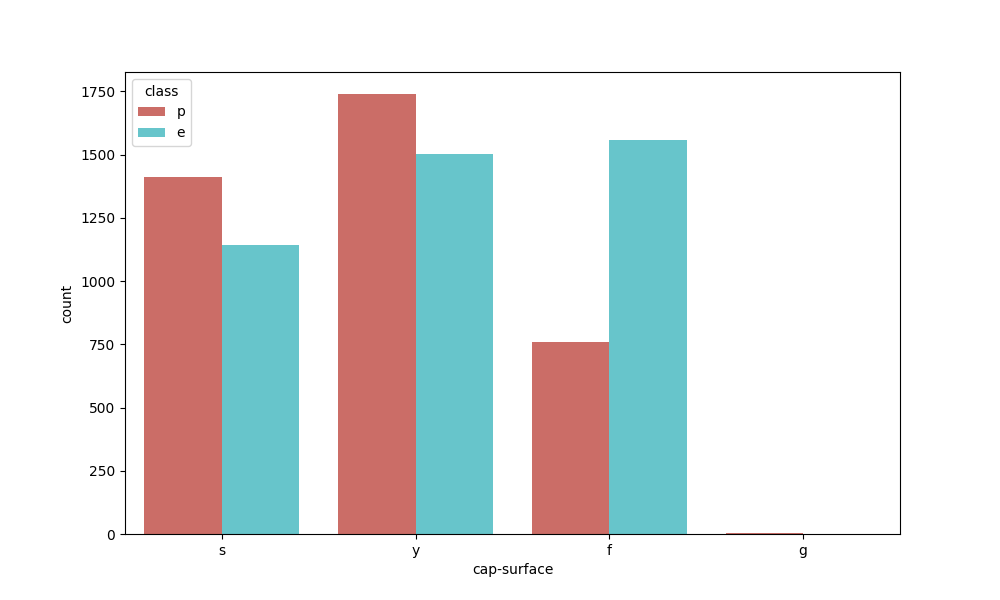

<IPython.core.display.Javascript object>


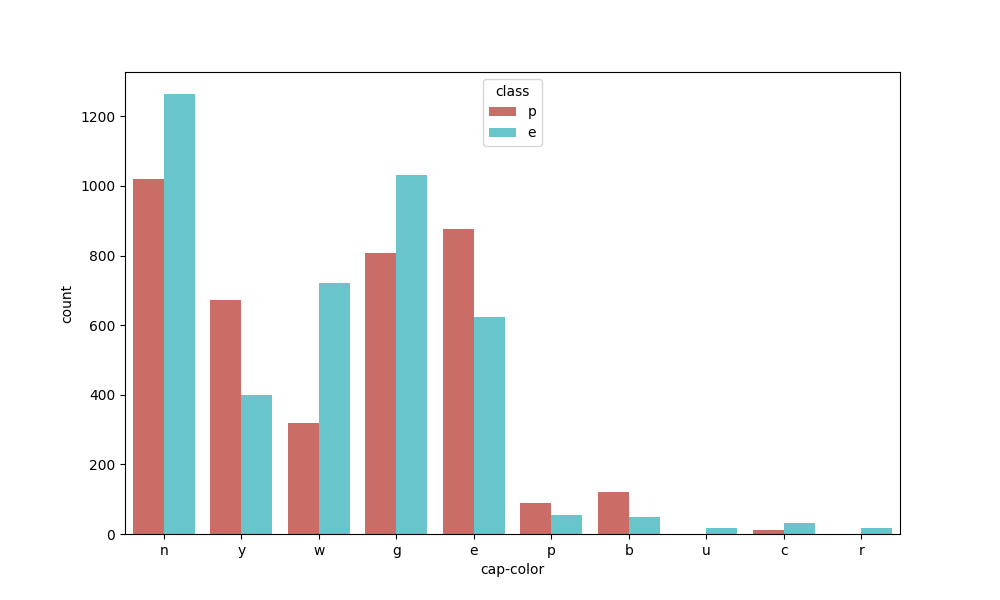

<IPython.core.display.Javascript object>


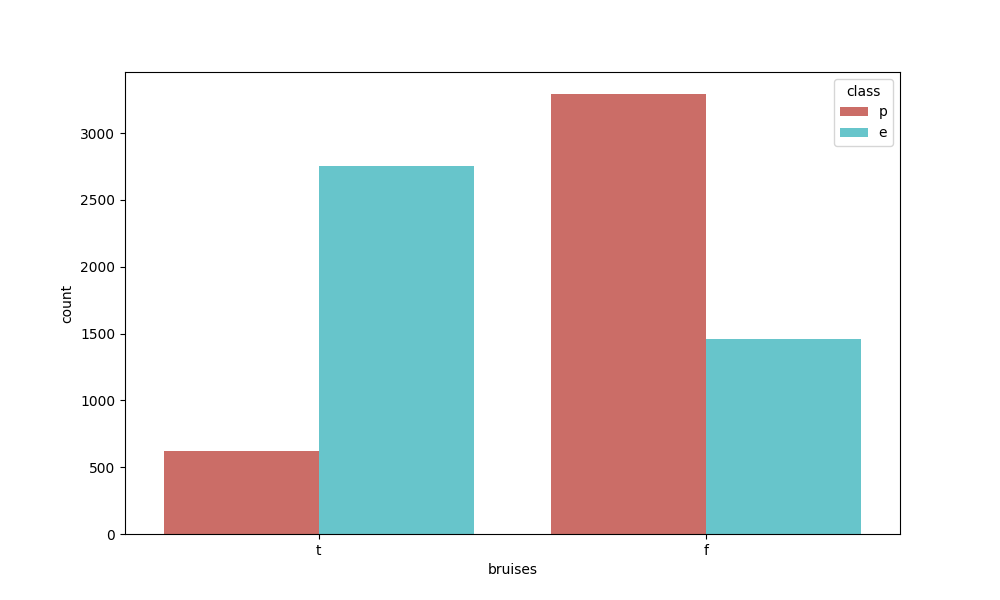

<IPython.core.display.Javascript object>


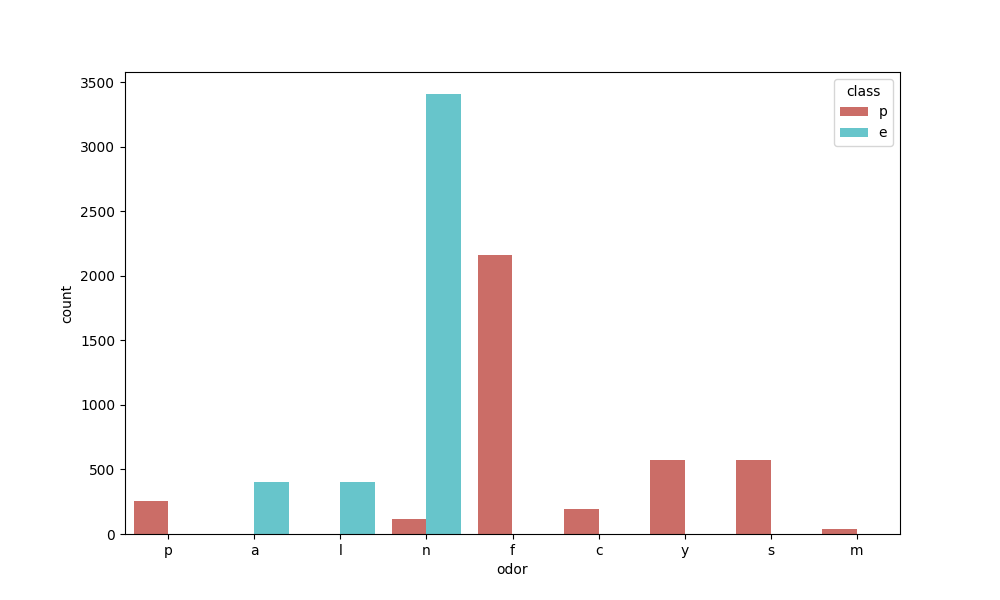

<IPython.core.display.Javascript object>


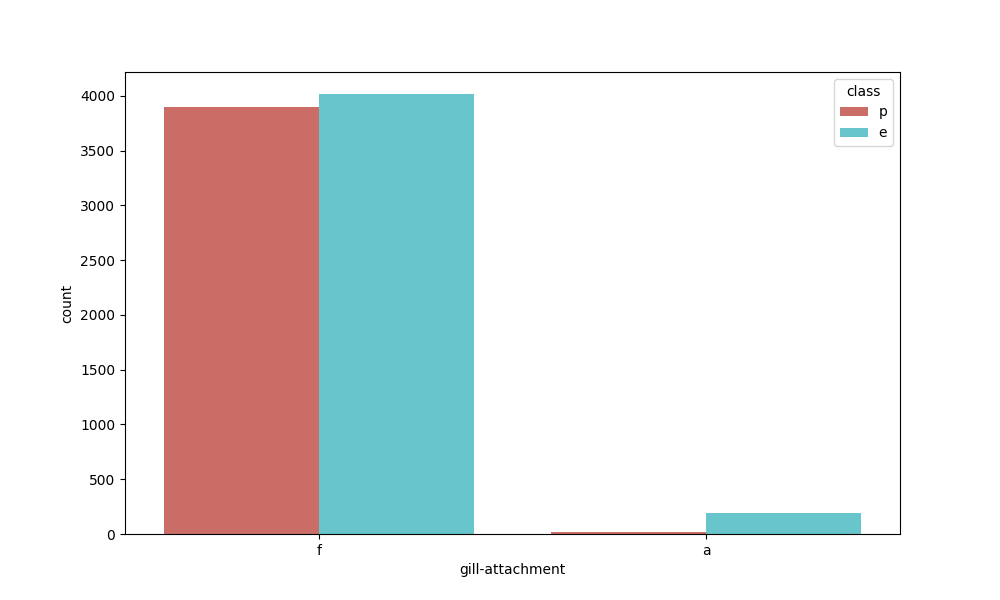

<IPython.core.display.Javascript object>


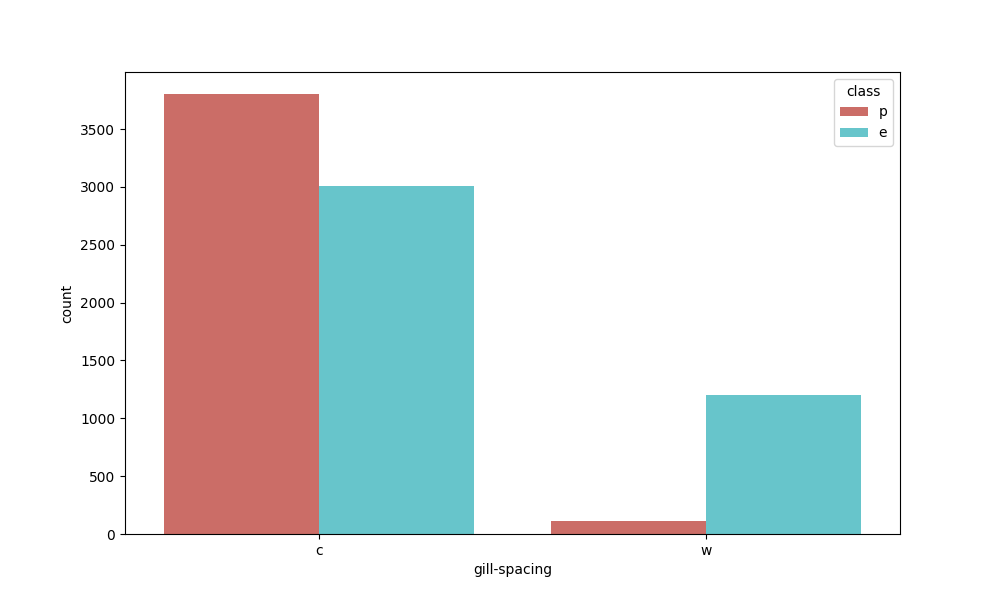

<IPython.core.display.Javascript object>


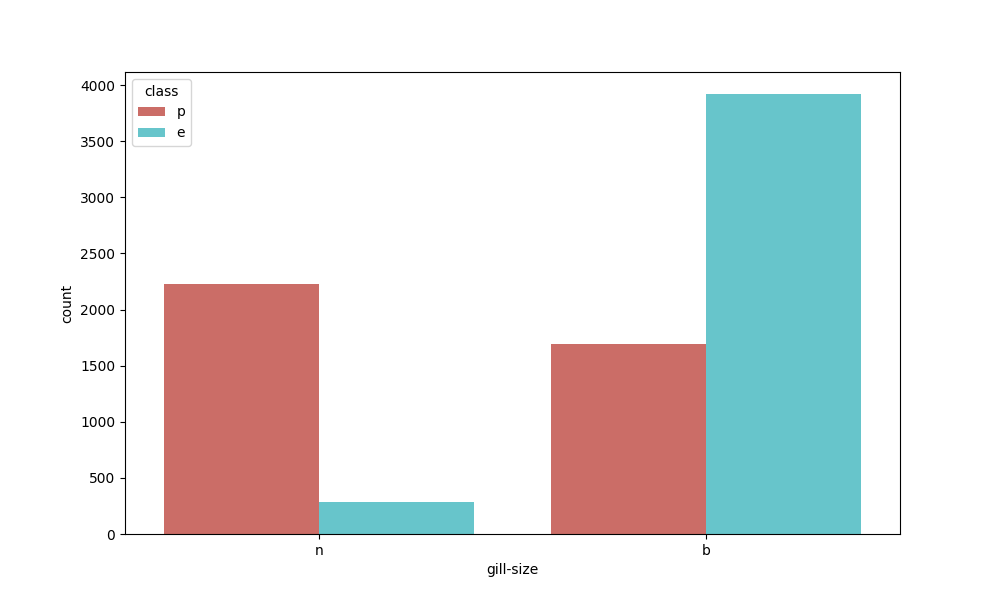

<IPython.core.display.Javascript object>


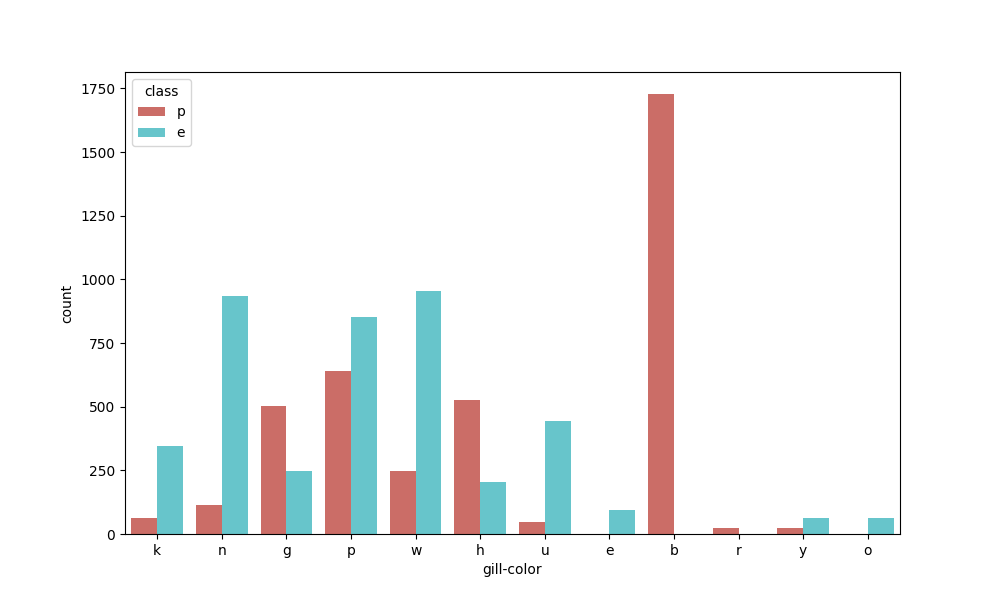

<IPython.core.display.Javascript object>


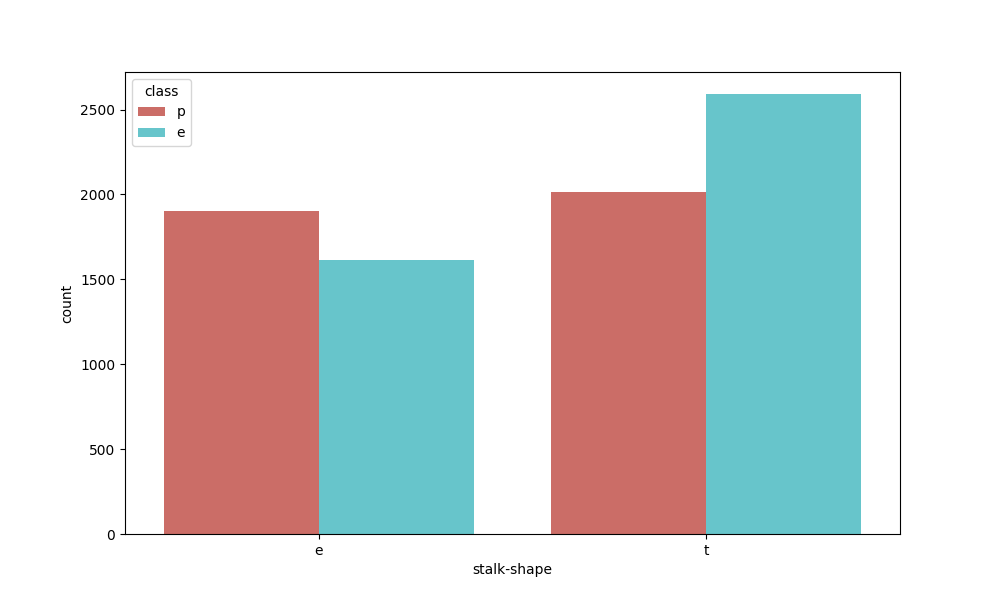

<IPython.core.display.Javascript object>


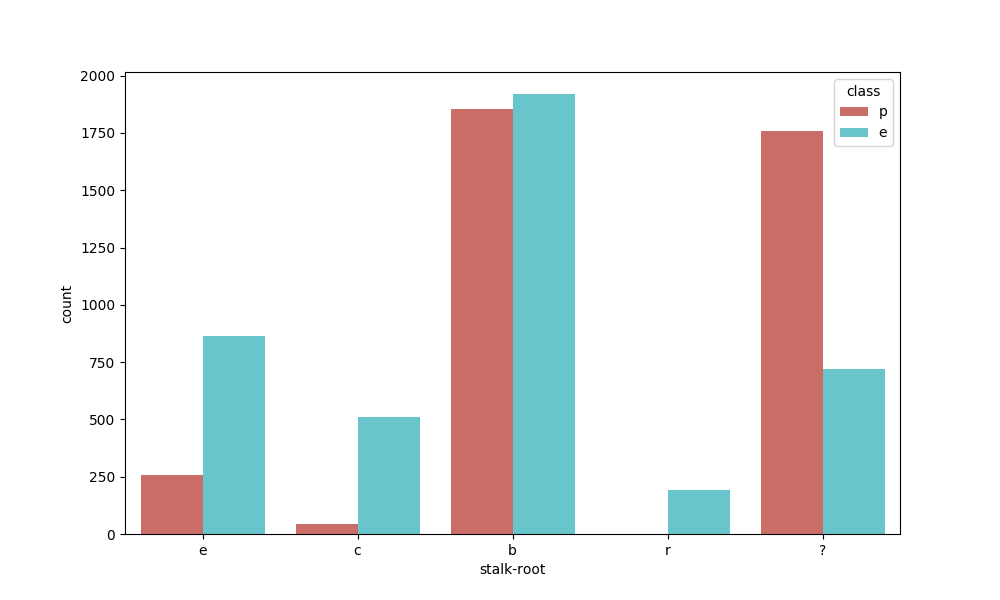

<IPython.core.display.Javascript object>


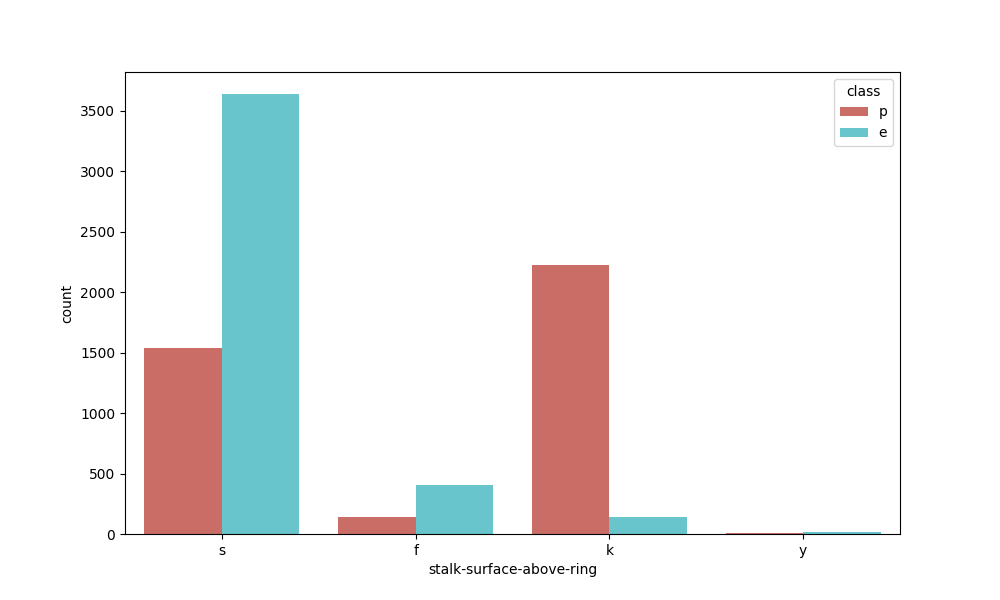

<IPython.core.display.Javascript object>


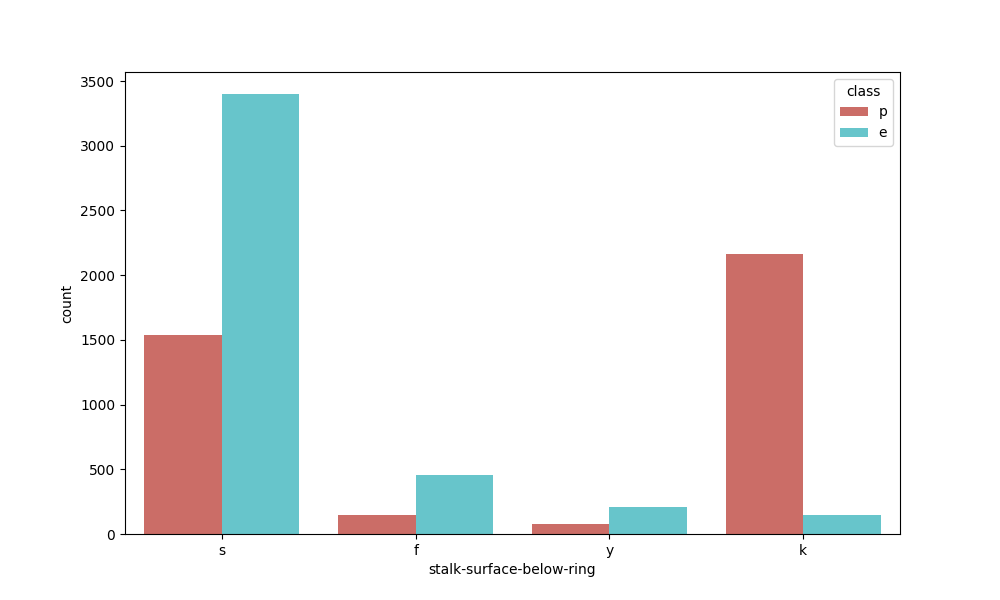

<IPython.core.display.Javascript object>


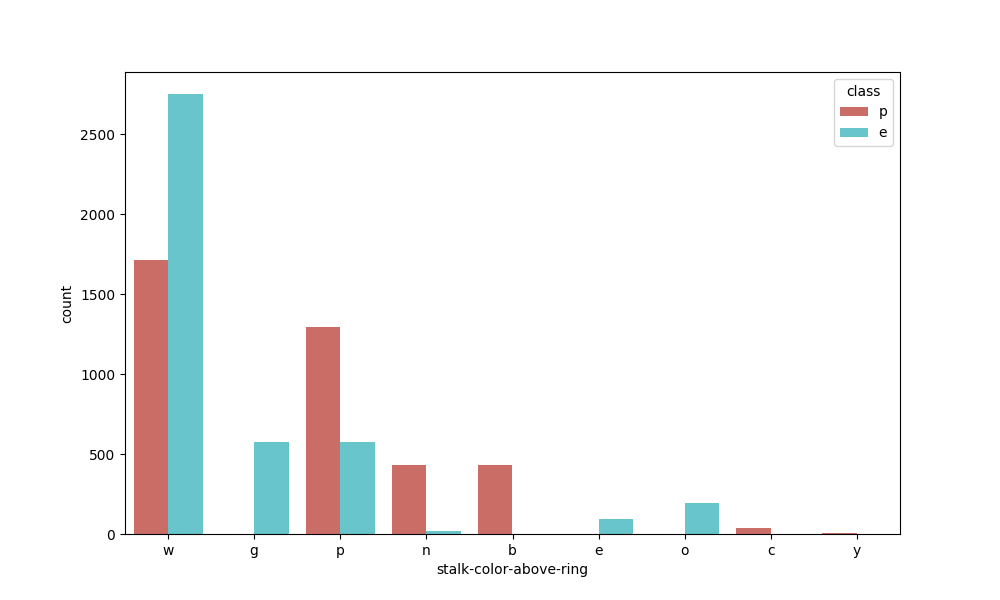

<IPython.core.display.Javascript object>


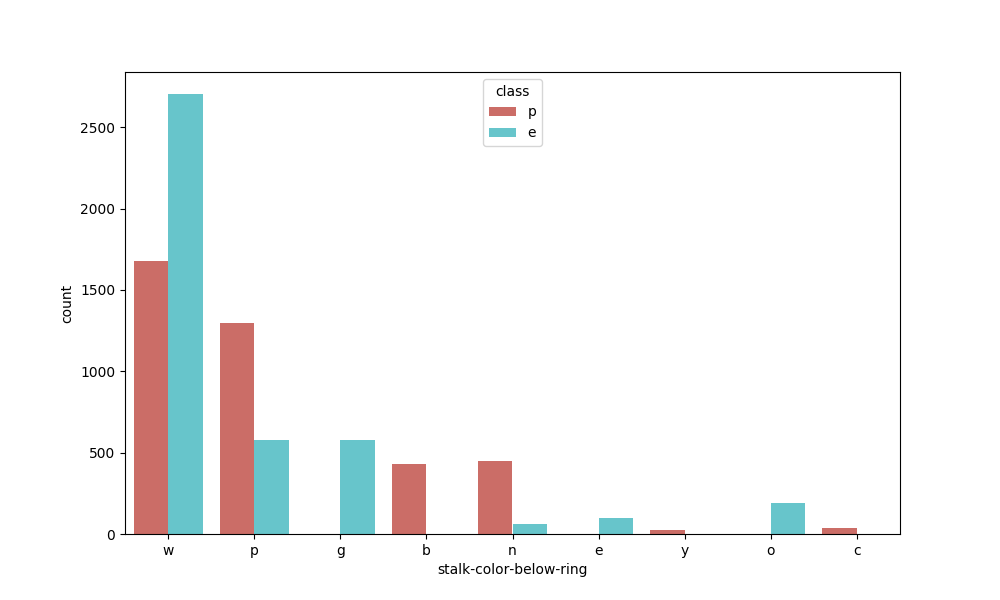

<IPython.core.display.Javascript object>


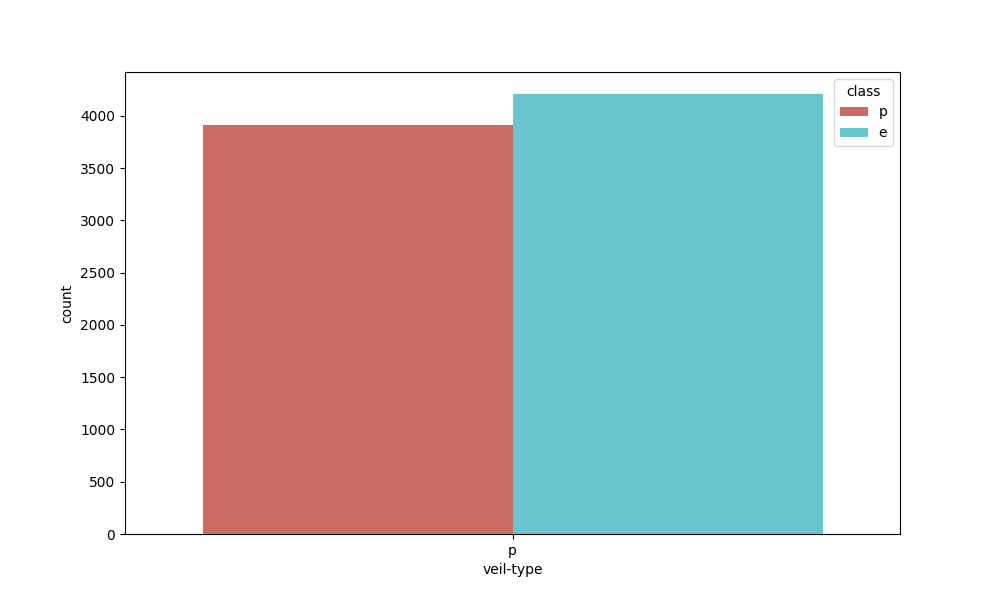

<IPython.core.display.Javascript object>


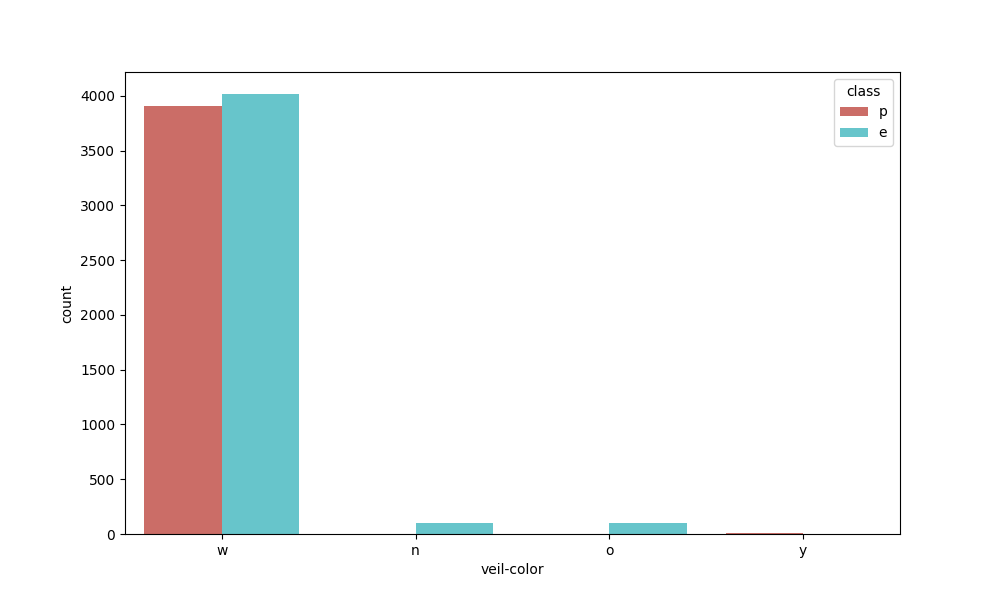

<IPython.core.display.Javascript object>


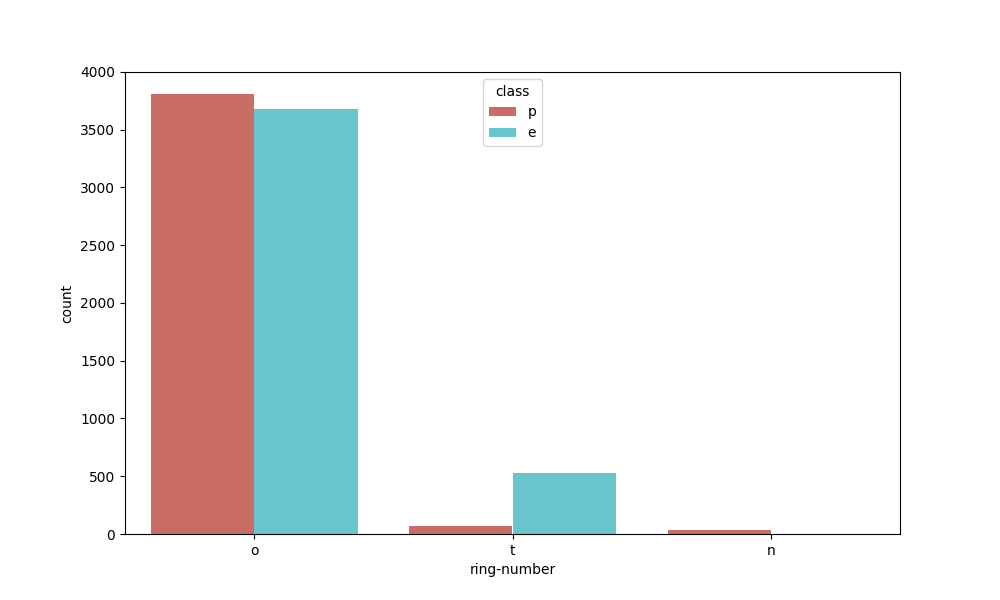

<IPython.core.display.Javascript object>


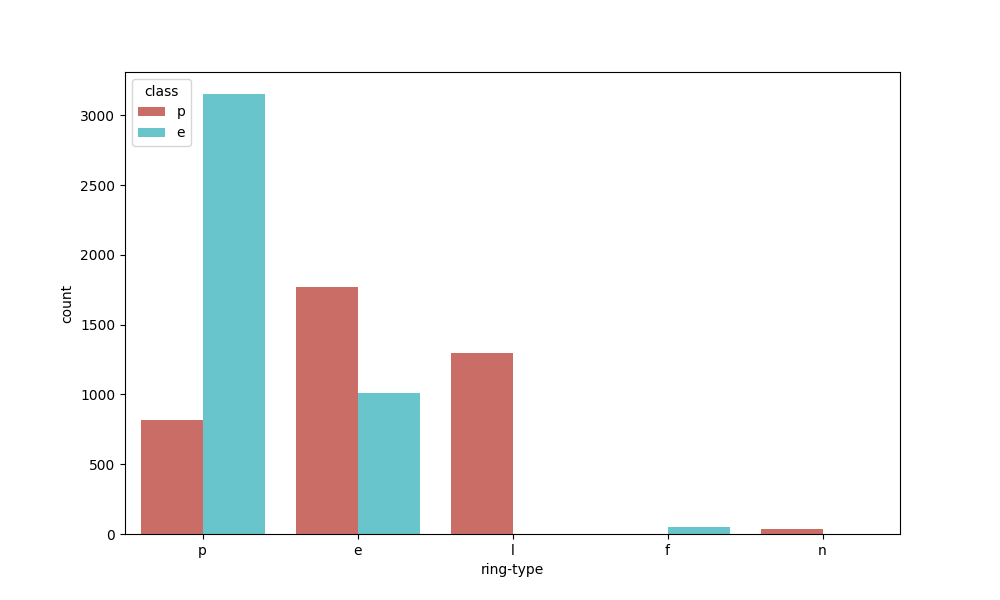

<IPython.core.display.Javascript object>


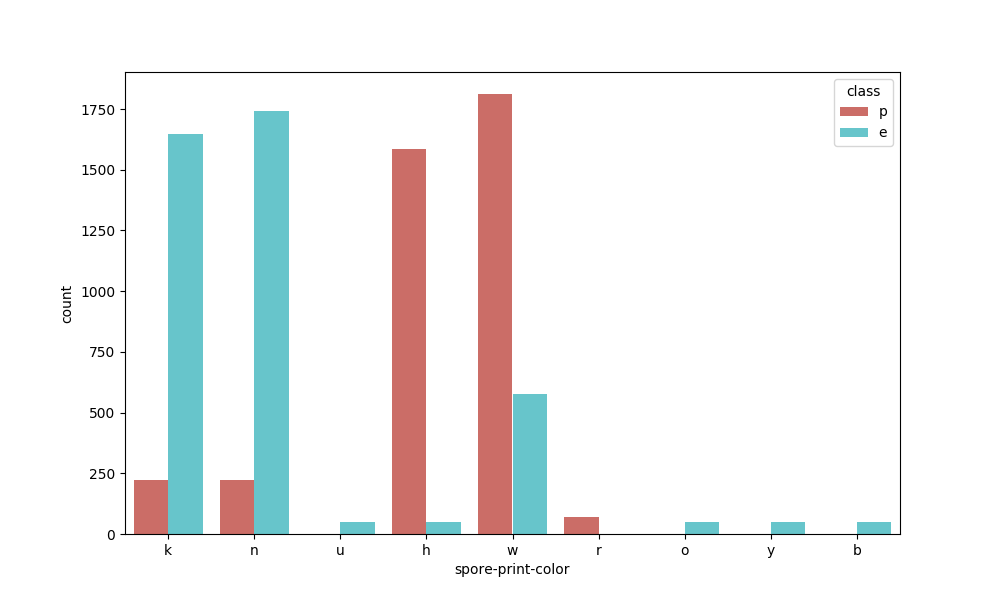

/home/levan/scripts/ds_new/venv_ds/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


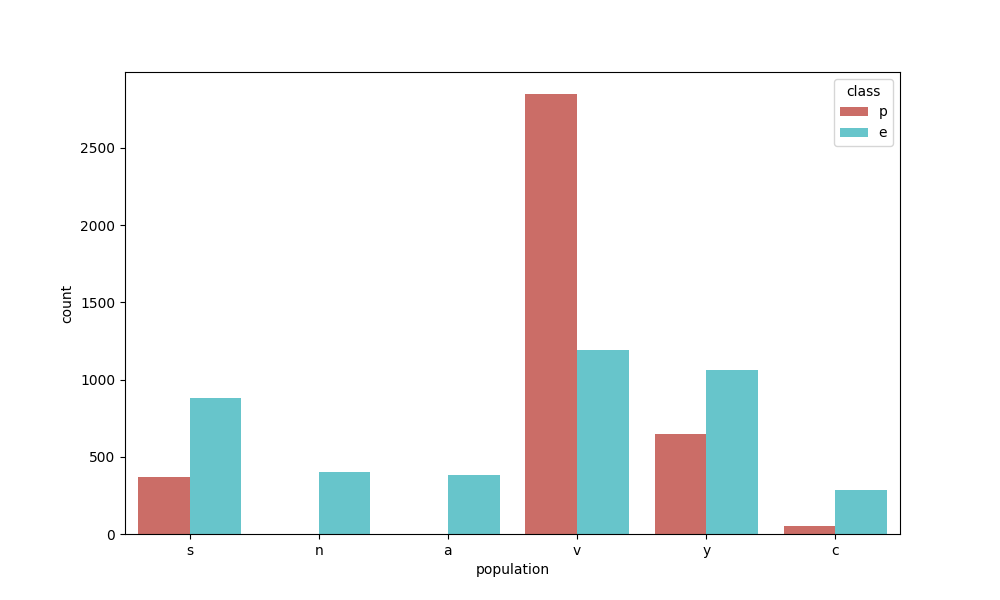

<IPython.core.display.Javascript object>


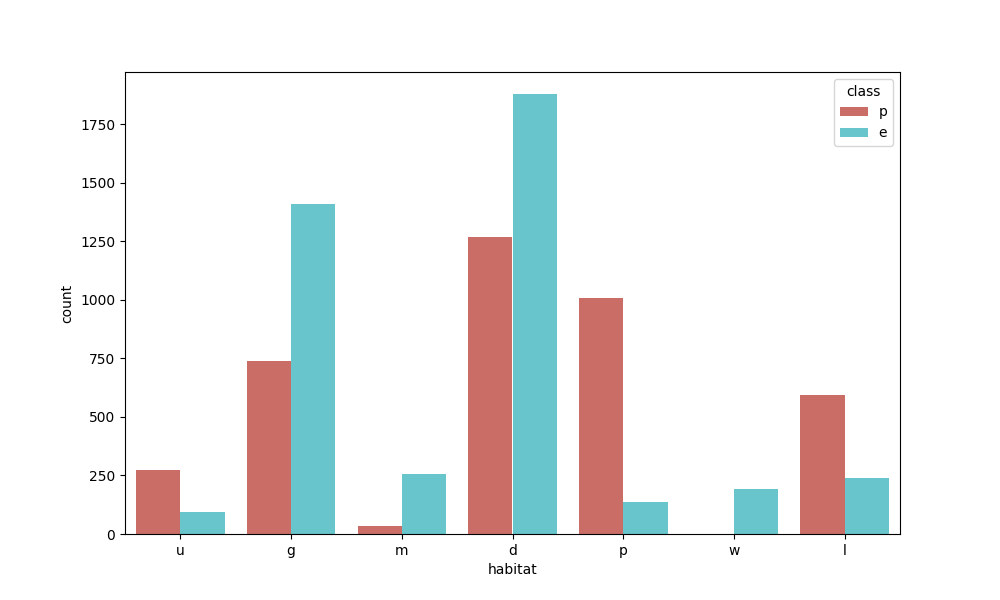

In [10]:
for feat in list(df.columns[1:]):
    fig, ax = plt.subplots(figsize=(10,6))
    g = sns.countplot(df[feat], ax=ax, data = df[[feat, 'class']], hue='class', palette='hls')

It can be seen that bruises, odor, gill size and color, spore-print-color are pretty interesting features

In [11]:
labels = df['class'].map(lambda x: 1 if x == 'p' else 0).values

In [12]:
labels.shape

(8124,)

In [13]:
df = df.drop(['class', 'veil-type'], axis = 1)

In [14]:
df_encoded = pd.get_dummies(df)  # categorical values - so one hot encoding should be the best choice

In [15]:
df_encoded.shape

(8124, 116)

In [16]:
# let's take a look at the correlations
df_encoded_with_labels = df_encoded.copy()
df_encoded_with_labels['labels'] = labels

labels_correlations = df_encoded_with_labels.corr()['labels']
labels_correlations = labels_correlations.sort_values()
labels_correlations

odor_n                       -0.785557
ring-type_p                  -0.540469
gill-size_b                  -0.540024
bruises_t                    -0.501530
stalk-surface-above-ring_s   -0.491314
stalk-surface-below-ring_s   -0.425444
spore-print-color_n          -0.416645
spore-print-color_k          -0.396832
gill-spacing_w               -0.348387
gill-color_n                 -0.288943
stalk-color-above-ring_g     -0.266489
stalk-color-below-ring_g     -0.266489
gill-color_w                 -0.231316
population_n                 -0.219529
odor_l                       -0.219529
odor_a                       -0.219529
stalk-root_c                 -0.218548
stalk-color-above-ring_w     -0.217740
population_a                 -0.214871
stalk-color-below-ring_w     -0.214112
ring-number_t                -0.204600
stalk-root_e                 -0.202839
cap-surface_f                -0.195415
gill-color_u                 -0.195359
cap-shape_b                  -0.182567
habitat_g                

Seems that stalk-surface-above-ring and stalk-surface-below-ring can also be helpful features

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, labels, test_size=0.2, stratify=labels, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.bincount(y_train), '[edible, poisonous]')

(6499, 116) (1625, 116) (6499,) (1625,)
[3366 3133] [edible, poisonous]


In [19]:
# stupid head-first approach
lr_simple = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

In [20]:
lr_simple.score(X_test, y_test)

1.0

In [21]:
(lr_simple.predict(X_test) == y_test).all()

True

well, okay. let's check some feature importances

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=5, random_state=50).fit(X_train, y_train)
# max_depth = 5 gives the 100% accuracy, but will be bad for visualization

In [27]:
tree.score(X_test, y_test)

0.9883076923076923

In [28]:
# checking feature importances
sorted(zip(tree.feature_importances_, X_test.columns, range(len(X_test.columns))), reverse=True)

[(0.6534257466402917, 'odor_n', 27),
 (0.18720067385824252, 'stalk-root_c', 53),
 (0.10729890243753894, 'stalk-surface-below-ring_y', 63),
 (0.03492191612874113, 'spore-print-color_r', 99),
 (0.017152760935185685, 'stalk-color-above-ring_c', 65),
 (0.0, 'veil-color_y', 85),
 (0.0, 'veil-color_w', 84),
 (0.0, 'veil-color_o', 83),
 (0.0, 'veil-color_n', 82),
 (0.0, 'stalk-surface-below-ring_s', 62),
 (0.0, 'stalk-surface-below-ring_k', 61),
 (0.0, 'stalk-surface-below-ring_f', 60),
 (0.0, 'stalk-surface-above-ring_y', 59),
 (0.0, 'stalk-surface-above-ring_s', 58),
 (0.0, 'stalk-surface-above-ring_k', 57),
 (0.0, 'stalk-surface-above-ring_f', 56),
 (0.0, 'stalk-shape_t', 50),
 (0.0, 'stalk-shape_e', 49),
 (0.0, 'stalk-root_r', 55),
 (0.0, 'stalk-root_e', 54),
 (0.0, 'stalk-root_b', 52),
 (0.0, 'stalk-root_?', 51),
 (0.0, 'stalk-color-below-ring_y', 81),
 (0.0, 'stalk-color-below-ring_w', 80),
 (0.0, 'stalk-color-below-ring_p', 79),
 (0.0, 'stalk-color-below-ring_o', 78),
 (0.0, 'stalk-col

It can be seen that odor and spore print color are important features.
Gill info was concidered here as unimportant. Instead we have stalk root.

In [29]:
from sklearn.tree import export_graphviz
tree_output = export_graphviz(tree, feature_names=X_train.columns, class_names=['edible', 'poisonous'])

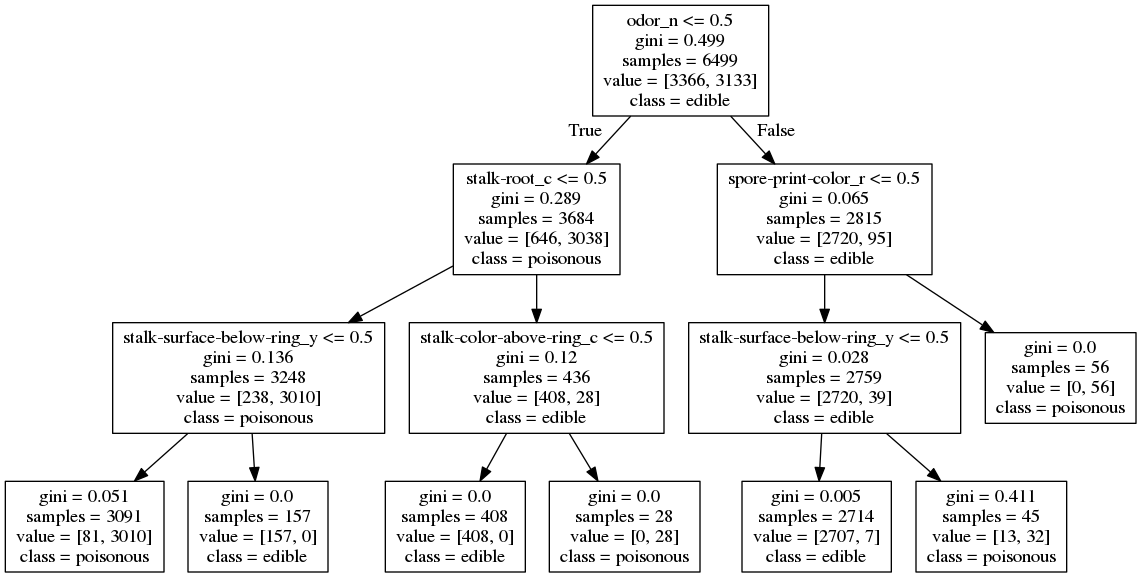

In [30]:
import pydotplus
from IPython.display import Image  

graph = pydotplus.graph_from_dot_data(tree_output)  
Image(graph.create_png())

So, if odor_n == 1, the mushroom is likely to be edible, unless spore-print-color is red or stalk-surface-below-ring_y == 1 (whatever this means).

If odor_n == 0, the mushroom is likely to be poisonous, unless stalk-root_c == 1  and stalk-surface-above-ring_c == 0 or stalk-root_c == 0 and surface-below-ring-y == 1.

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(0.9).fit(X_train)

In [33]:
X_train_pca = pca.transform(X_train)
X_train_pca.shape

(6499, 31)

In [34]:
lr_2 = LogisticRegression(solver='lbfgs')
lr_2.fit(X_train_pca, y_train)
lr_2.score(pca.transform(X_test), y_test)

0.9901538461538462

so, we can reduce the number of dimensions from 116 to 31 and the accuracy won't be awful. No point in that since training is completed almost instantly.

In [35]:
# a bit of overkill, but why not. Try RF
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1,
                            max_features='auto', max_leaf_nodes=None, bootstrap=True, n_jobs=-1, verbose=0, )
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [36]:
#  there are more important features for random forest because different trees have different features
#  and will make splits based on different features as well.
sorted(zip(rf.feature_importances_, X_test.columns, range(len(X_test.columns))), reverse=True)

[(0.13597320212609215, 'odor_n', 27),
 (0.08080990754281099, 'odor_f', 24),
 (0.06154842825769065, 'gill-size_b', 35),
 (0.05812193300309351, 'gill-size_n', 36),
 (0.05254716379449075, 'spore-print-color_h', 95),
 (0.04470750743355393, 'gill-color_b', 37),
 (0.03447093984015536, 'ring-type_p', 93),
 (0.0318759367393082, 'stalk-surface-above-ring_k', 57),
 (0.028011189972157225, 'bruises_t', 21),
 (0.02592408871402108, 'stalk-surface-below-ring_k', 61),
 (0.023557652150135434, 'ring-type_l', 91),
 (0.023246269938603882, 'stalk-surface-above-ring_s', 58),
 (0.021633187836874027, 'gill-spacing_c', 33),
 (0.01819365473392488, 'population_v', 107),
 (0.016333879511868203, 'stalk-shape_e', 49),
 (0.014671027551711246, 'gill-spacing_w', 34),
 (0.014651245276247494, 'odor_p', 28),
 (0.014052244439220636, 'bruises_f', 20),
 (0.01385054881485027, 'stalk-root_?', 51),
 (0.013502802124682628, 'spore-print-color_k', 96),
 (0.012554174063880043, 'stalk-surface-below-ring_s', 62),
 (0.012412664001056

Here we see odor, gill size and color, spore print color and bruises in the top.